# <center>**_MALARIA Prediction & Planning ToolKIT (MPPT)_**<center>

 

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### <center>**-ETL (Extrack Load Transform)**-<center>

In [4]:
df = pd.read_excel("../dataset/MPPT.xlsx")
df.head(10)

,Negara,Provinsi,Lat,Lon,Tahun,Jumlah Puskesmas,Jumlah Rumah Sakit Khusus,Jumlah Rumah Sakit Umum,Persentase kemiskinan (sem.1 (maret)),Persentase kemiskinan (sem.2 (september)),...,Suhu Maksimum,jumlah penduduk,Jumlah Penduduk (ribu jiwa),Luas Wilayah,Kepadatan penduduk (jiwa/km2),Persentase Rumah Tangga menurut Provinsi dan Memiliki Akses terhadap Sanitasi Layak (Persen),Jumlah Curah Hujan (mm),Jumlah Hari Hujan (hari),Annual Parasite Incidence (API),"Status Endemisitas (0=Eliminasi, 1=Rendah, 2=Sedang, 3=Tinggi)"
0,Indonesia,Aceh,4.695135,96.749399,2012,330.0,5.0,46.0,19.46,18.58,...,34.6,4715000.0,4715.0,57956.0,82,52.53,1098.0,137.0,0.439,1
1,Indonesia,North Sumatra,2.115355,99.545097,2012,555.0,16.0,158.0,10.67,10.41,...,36.9,13408000.0,13408.0,72981.0,184,59.70,3175.0,227.0,0.842,1
2,Indonesia,West Sumatra,-0.739940,100.800005,2012,260.0,21.0,38.0,8.19,8.00,...,31.5,5000000.0,5000.0,42012.0,120,44.36,4339.0,230.0,0.247,1
3,Indonesia,Riau,0.293347,101.706829,2012,207.0,10.0,43.0,8.22,8.05,...,33.8,5879000.0,5879.0,87023.0,68,58.38,2636.0,217.0,0.202,1
4,Indonesia,Riau Islands,-1.485183,102.438058,2012,176.0,3.0,24.0,8.42,8.28,...,34.4,3227000.0,3227.0,5016.0,644,50.13,1874.0,191.0,1.287,2
5,Indonesia,Jambi,-3.319437,103.914399,2012,317.0,8.0,34.0,13.78,13.48,...,34.6,7714000.0,7714.0,91592.0,85,53.59,3083.0,194.0,0.195,1
6,Indonesia,South Sumatra,-3.577847,102.346388,2012,178.0,1.0,17.0,17.70,17.51,...,32.1,1784000.0,1784.0,19919.0,90,35.93,2545.0,143.0,5.319,3
7,Indonesia,Bangka Belitung Islands,-4.558585,105.406808,2012,276.0,9.0,37.0,16.18,15.65,...,34.1,7835000.0,7835.0,35376.0,222,43.72,1685.0,143.0,0.176,1
8,Indonesia,Bengkulu,-2.741051,106.440587,2012,60.0,1.0,12.0,5.53,5.37,...,32.6,1287000.0,1287.0,16424.0,79,75.40,2018.0,195.0,2.659,2
9,Indonesia,Lampung,3.945651,108.142867,2012,69.0,3.0,22.0,7.11,6.83,...,33.2,1805000.0,1805.0,8202.0,221,69.20,3253.0,202.0,2.473,2


In [5]:
#Drop data yang tidak penting
df = df.drop([ "Lat", "Tahun ", "Provinsi", "Jumlah Penduduk (ribu jiwa)", "Jumlah kemiskinan (sem.2 (september))", "Lon", "Negara"], axis=1)
df

,Jumlah Puskesmas,Jumlah Rumah Sakit Khusus,Jumlah Rumah Sakit Umum,Persentase kemiskinan (sem.1 (maret)),Persentase kemiskinan (sem.2 (september)),Jumlah Penduduk Yang Dicakup Asuransi Kesehatan Atau Sistem Kesehatan Masyarakat (Orang),Suhu Minimum,Suhu Rata-rata,Suhu Maksimum,jumlah penduduk,Luas Wilayah,Kepadatan penduduk (jiwa/km2),Persentase Rumah Tangga menurut Provinsi dan Memiliki Akses terhadap Sanitasi Layak (Persen),Jumlah Curah Hujan (mm),Jumlah Hari Hujan (hari),Annual Parasite Incidence (API),"Status Endemisitas (0=Eliminasi, 1=Rendah, 2=Sedang, 3=Tinggi)"
0,330.0,5.0,46.0,19.46,18.58,4494410.0,22.6,26.9,34.6,4715000.0,57956.00,82,52.53,1098.0,137.0,0.439,1
1,555.0,16.0,158.0,10.67,10.41,5828093.0,21.0,27.3,36.9,13408000.0,72981.00,184,59.70,3175.0,227.0,0.842,1
2,260.0,21.0,38.0,8.19,8.00,2747877.0,21.5,25.2,31.5,5000000.0,42012.00,120,44.36,4339.0,230.0,0.247,1
3,207.0,10.0,43.0,8.22,8.05,3602969.0,23.1,27.3,33.8,5879000.0,87023.00,68,58.38,2636.0,217.0,0.202,1
4,176.0,3.0,24.0,8.42,8.28,1354637.0,20.6,26.7,34.4,3227000.0,5016.00,644,50.13,1874.0,191.0,1.287,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,94.0,10.0,10.0,12.40,11.90,922998.0,20.4,27.9,35.6,1282000.0,16787.18,77,51.21,1167.9,93.0,0.170,1
132,199.0,439.0,62.0,19.51,19.36,1074841.0,20.1,26.5,35.3,1686000.0,46914.03,36,60.02,1987.2,167.0,5.810,3
133,127.0,418.0,104.0,6.84,6.22,559104.0,21.6,27.3,34.2,1162000.0,31982.50,37,59.17,913.4,127.0,2.770,2
134,151.0,1741.0,7.0,25.82,25.73,976954.0,21.8,27.4,33.8,872000.0,102955.15,9,62.81,2844.6,218.0,31.290,3


In [6]:
#cheeck null data
df.isnull().any()

Jumlah Puskesmas                                                                                False
Jumlah Rumah Sakit Khusus                                                                       False
Jumlah Rumah Sakit Umum                                                                         False
Persentase kemiskinan (sem.1 (maret))                                                           False
Persentase kemiskinan (sem.2 (september))                                                       False
Jumlah Penduduk Yang Dicakup Asuransi Kesehatan Atau Sistem Kesehatan Masyarakat (Orang)        False
Suhu Minimum                                                                                    False
Suhu Rata-rata                                                                                  False
Suhu Maksimum                                                                                   False
jumlah penduduk                                                                   

In [7]:
'''
pembagian data dan normalisasi

- X = fitur
- Y_reg = keluaran untuk prediksi Annual Parasite Incidence (API)  
- Y_clf = Keluaran untuk prediksi Status Endemisitas (0=Eliminasi, 1=Rendah, 2=Sedang, 3=Tinggi)     

'''

X = df.iloc[:, :-2]
Y_reg = df.iloc[:,-2]
Y_clf = df.iloc[:,-1]

In [8]:
X

,Jumlah Puskesmas,Jumlah Rumah Sakit Khusus,Jumlah Rumah Sakit Umum,Persentase kemiskinan (sem.1 (maret)),Persentase kemiskinan (sem.2 (september)),Jumlah Penduduk Yang Dicakup Asuransi Kesehatan Atau Sistem Kesehatan Masyarakat (Orang),Suhu Minimum,Suhu Rata-rata,Suhu Maksimum,jumlah penduduk,Luas Wilayah,Kepadatan penduduk (jiwa/km2),Persentase Rumah Tangga menurut Provinsi dan Memiliki Akses terhadap Sanitasi Layak (Persen),Jumlah Curah Hujan (mm),Jumlah Hari Hujan (hari)
0,330.0,5.0,46.0,19.46,18.58,4494410.0,22.6,26.9,34.6,4715000.0,57956.00,82,52.53,1098.0,137.0
1,555.0,16.0,158.0,10.67,10.41,5828093.0,21.0,27.3,36.9,13408000.0,72981.00,184,59.70,3175.0,227.0
2,260.0,21.0,38.0,8.19,8.00,2747877.0,21.5,25.2,31.5,5000000.0,42012.00,120,44.36,4339.0,230.0
3,207.0,10.0,43.0,8.22,8.05,3602969.0,23.1,27.3,33.8,5879000.0,87023.00,68,58.38,2636.0,217.0
4,176.0,3.0,24.0,8.42,8.28,1354637.0,20.6,26.7,34.4,3227000.0,5016.00,644,50.13,1874.0,191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,94.0,10.0,10.0,12.40,11.90,922998.0,20.4,27.9,35.6,1282000.0,16787.18,77,51.21,1167.9,93.0
132,199.0,439.0,62.0,19.51,19.36,1074841.0,20.1,26.5,35.3,1686000.0,46914.03,36,60.02,1987.2,167.0
133,127.0,418.0,104.0,6.84,6.22,559104.0,21.6,27.3,34.2,1162000.0,31982.50,37,59.17,913.4,127.0
134,151.0,1741.0,7.0,25.82,25.73,976954.0,21.8,27.4,33.8,872000.0,102955.15,9,62.81,2844.6,218.0


In [9]:
Y_clf

0      1
1      1
2      1
3      1
4      2
      ..
131    1
132    3
133    2
134    3
135    3
Name: Status Endemisitas (0=Eliminasi, 1=Rendah, 2=Sedang, 3=Tinggi), Length: 136, dtype: int64

In [10]:
Y_reg

0       0.439
1       0.842
2       0.247
3       0.202
4       1.287
        ...  
131     0.170
132     5.810
133     2.770
134    31.290
135    31.930
Name: Annual Parasite Incidence (API), Length: 136, dtype: float64

In [11]:
#normalisasi fitur (x)

stdScaler = StandardScaler() # ada nilai minus
minmaxScaler = MinMaxScaler() # tanpa nilai minus

X_stdScaled = stdScaler.fit_transform(X)
X_minmaxScaled = minmaxScaler.fit_transform(X)


In [12]:
X_stdScaled

array([[ 0.17402365, -0.2955181 , -0.26997728, ..., -0.33087817,
        -1.45317717, -1.03500353],
       [ 1.12252385, -0.28984986,  0.5147112 , ...,  0.15014372,
         1.06317367,  1.08918302],
       [-0.1210653 , -0.28727338, -0.32602645, ..., -0.8789882 ,
         2.47339629,  1.15998924],
       ...,
       [-0.6817343 , -0.08270136,  0.13637926, ...,  0.11458701,
        -1.67682588, -1.27102426],
       [-0.58056095,  0.5990336 , -0.54321701, ...,  0.35878781,
         0.66288367,  0.87676436],
       [ 0.44381927,  6.56975393,  0.99112921, ..., -1.97386649,
        -1.24976104, -0.30333927]])

In [13]:
X_minmaxScaled

array([[2.81437126e-01, 3.67026352e-04, 4.17972832e-02, ...,
        4.97676326e-01, 1.39101766e-01, 3.50253807e-01],
       [5.05988024e-01, 1.17448433e-03, 1.58829676e-01, ...,
        5.95680700e-01, 5.92585315e-01, 8.07106599e-01],
       [2.11576846e-01, 1.54151068e-03, 3.34378265e-02, ...,
        3.86003280e-01, 8.46728237e-01, 8.22335025e-01],
       ...,
       [7.88423154e-02, 3.06834031e-02, 1.02403344e-01, ...,
        5.88436304e-01, 9.87969695e-02, 2.99492386e-01],
       [1.02794411e-01, 1.27798576e-01, 1.04493208e-03, ...,
        6.38190268e-01, 5.20447152e-01, 7.61421320e-01],
       [3.45309381e-01, 9.78345445e-01, 2.29885057e-01, ...,
        1.62930563e-01, 1.75760355e-01, 5.07614213e-01]])

### <center>**-MEMBUAT MODEL PREDIKSI-**<center>

In [14]:
%cd D:
%cd /MPPT


d:\MPPT\notebook
d:\MPPT


In [15]:
import numpy as np
from MPPT_src.mppt_model import MPPT_Model
from sklearn.model_selection import train_test_split

##### *MODEL ENDEMISITAS MALARIA

In [16]:
save_path_ml = 'model\ml_cls'
save_path_mlp = 'model\mlp_cls'

In [17]:
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X_minmaxScaled, Y_clf, test_size=0.1, random_state=42)
model_endemisitas = MPPT_Model(predict_model='END')
model_endemisitas.input_data(X_train, X_test, y_clf_train, y_clf_test)

In [18]:
#training model ML untuk klasifikasi ENDEMISITAS MALARIA
model_endemisitas.train_mppt_ml()

2023-03-07 22:25:22.329 | INFO     | MPPT_src.mppt_model:train_mppt_ml:241 - Training Model Machine Learning Untuk Klasifikasi ENDEMISITAS MLARIA


In [19]:
#save best model
model_endemisitas.find_and_save_best_ml_model(save_path=save_path_ml)

2023-03-07 22:25:25.782 | INFO     | MPPT_src.mppt_model:find_and_save_best_ml_model:277 - Best Model ENDEMISITAS MALARIA -> DTc dengan akurasi 92.85714285714286%
2023-03-07 22:25:25.892 | INFO     | MPPT_src.mppt_model:find_and_save_best_ml_model:283 - model saved model\ml_cls/DTc.pkl


In [20]:
train_acc, test_acc, cfms = model_endemisitas.all_ml_acc_and_cfm()
test_acc

{'KNc': 0.7857142857142857,
 'GNBc': 0.6428571428571429,
 'BNBc': 0.7142857142857143,
 'DTc': 0.9285714285714286,
 'RFc': 0.9285714285714286,
 'ABc': 0.7142857142857143,
 'SVc': 0.7142857142857143,
 'GBc': 0.9285714285714286}

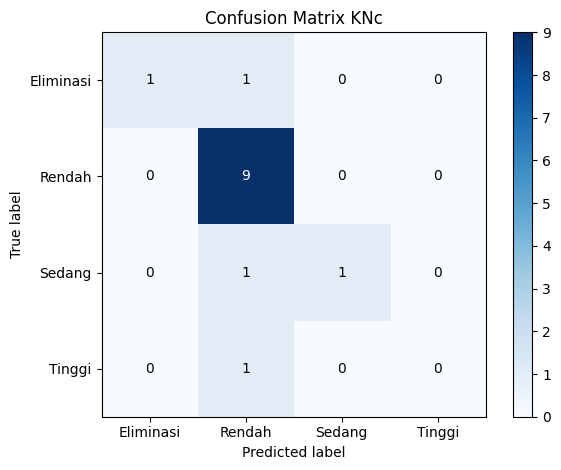

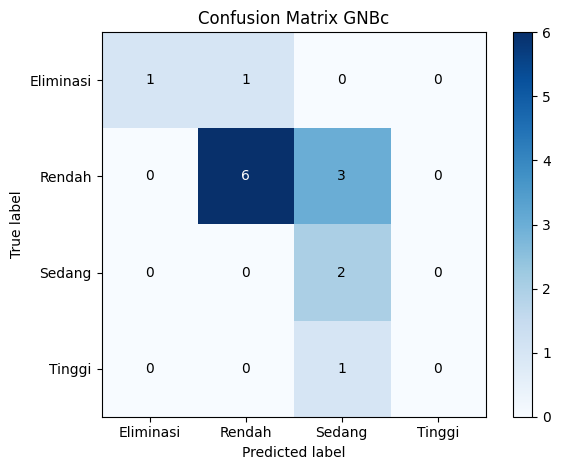

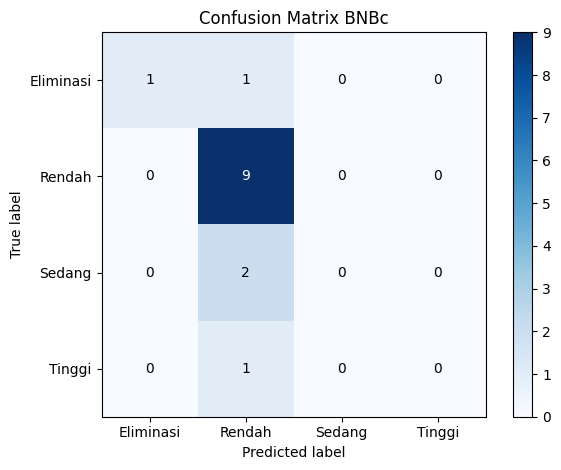

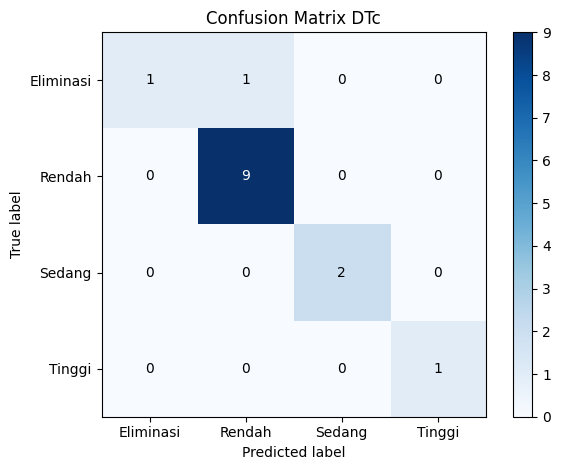

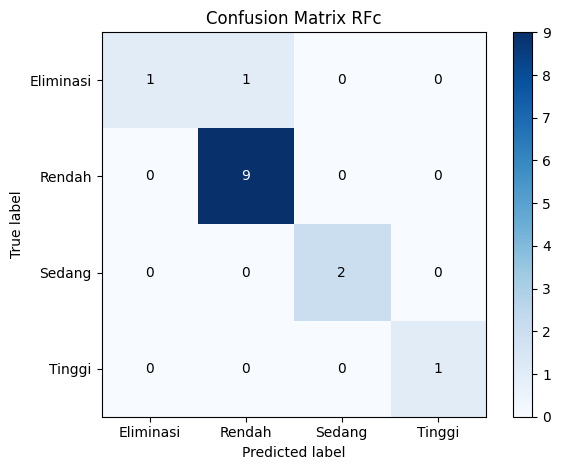

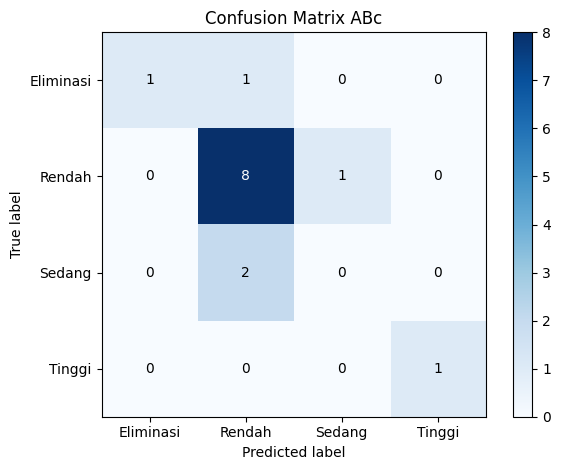

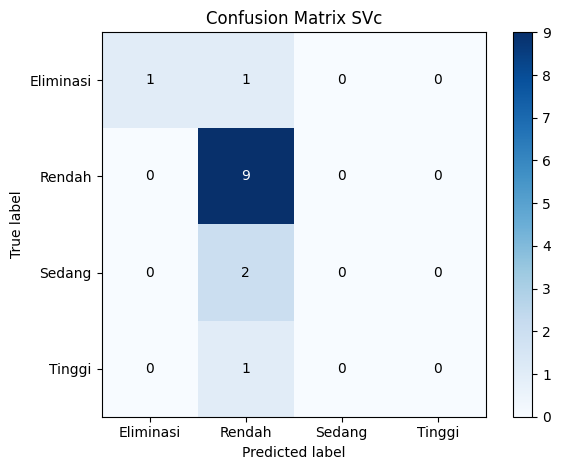

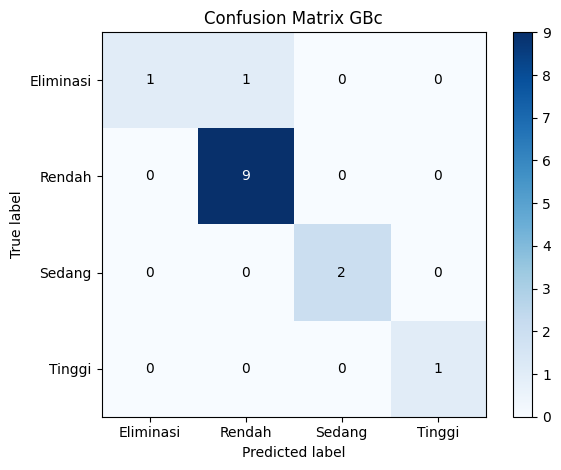

In [21]:
#cetak confusion matrix
for model, cfm in cfms.items():
      model_endemisitas.viz_confusion_matrix(model_name=model, cfm=cfm)


In [22]:
# training model mlp ENDEMISITAS MALARIA
mlp_layer = [256, 128, 32, 16]
model_endemisitas.build_mppt_mlp(*mlp_layer)
model_endemisitas.mppt_mlp_summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4096      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 4)                 68        
                                                                 
Total params: 41,716
Trainable params: 41,716
Non-trainable params: 0
_________________________________________________________________


In [23]:
model_endemisitas.mppt_mlp_fit(batch_size=8, epoch=100)

Epoch 1/100
13/13 [==============================] - 4s 80ms/step - loss: 1.3036 - accuracy: 0.5258 - val_loss: 1.2161 - val_accuracy: 0.6000
Epoch 2/100
13/13 [==============================] - 0s 24ms/step - loss: 1.1584 - accuracy: 0.5052 - val_loss: 0.8653 - val_accuracy: 0.7600
Epoch 3/100
13/13 [==============================] - 0s 27ms/step - loss: 0.9226 - accuracy: 0.6701 - val_loss: 0.8190 - val_accuracy: 0.6800
Epoch 4/100
13/13 [==============================] - 0s 19ms/step - loss: 0.9040 - accuracy: 0.5979 - val_loss: 0.9335 - val_accuracy: 0.6400
Epoch 5/100
13/13 [==============================] - 0s 13ms/step - loss: 0.8106 - accuracy: 0.6289 - val_loss: 0.8300 - val_accuracy: 0.6400
Epoch 6/100
13/13 [==============================] - 0s 21ms/step - loss: 0.8782 - accuracy: 0.6082 - val_loss: 0.7581 - val_accuracy: 0.6400
Epoch 7/100
13/13 [==============================] - 0s 13ms/step - loss: 0.8384 - accuracy: 0.6289 - val_loss: 1.1282 - val_accuracy: 0.5600
Epoch 

In [24]:
model_endemisitas.mppt_mlp_evaluate()

1/1 [==============================] - 0s 67ms/step - loss: 0.5143 - accuracy: 0.7857


2023-03-07 22:26:01.274 | INFO     | MPPT_src.mppt_model:mppt_mlp_evaluate:173 - Loss: 0.51433265209198 & Accuracy: 0.7857142686843872


In [25]:
model_path = 'model\mlp_cls/end_model.h5'
model = model_endemisitas.load_mppt_mlp(model_path)

2023-03-07 22:26:01.440 | INFO     | MPPT_src.mppt_model:load_mppt_mlp:182 - model mlp mppt model\mlp_cls/end_model.h5 loaded!


In [26]:
model_endemisitas.mppt_mlp_predict(data=np.random.rand(1, 15), model=model)

1/1 [==============================] - 0s 430ms/step


2023-03-07 22:26:02.500 | INFO     | MPPT_src.mppt_model:mppt_mlp_predict:202 - Hasil prediksi Endimisitas Malaria -> Rendah


'status: Rendah'

##### *MODEL API

In [27]:
save_path_ml = 'model\ml_reg'
save_path_mlp = 'model\mlp_reg'

In [28]:
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X_minmaxScaled, Y_reg, test_size=0.2, random_state=42)
model_api = MPPT_Model(predict_model='API')
model_api.input_data(X_train, X_test, y_reg_train, y_reg_test)

In [29]:
#train model ML untuk regresi API
model_api.train_mppt_ml()

2023-03-07 22:26:03.185 | INFO     | MPPT_src.mppt_model:train_mppt_ml:254 - Training Model Machine Learning Untuk Regresi Annual Parasite Incidence(API)


In [30]:
model_api.find_and_save_best_ml_model(save_path=save_path_ml)

2023-03-07 22:26:04.484 | INFO     | MPPT_src.mppt_model:find_and_save_best_ml_model:292 - Best Model Annual Parasite Incidence(API) -> RFr dengan akurasi 93.90478940901201%
2023-03-07 22:26:05.093 | INFO     | MPPT_src.mppt_model:find_and_save_best_ml_model:298 - model saved model\ml_reg/RFr.pkl


In [31]:
model_api.all_ml_acc_and_cfm()

({'RDr': 0.7030297286079976,
  'LSr': 0.3428488573466326,
  'KNr': 0.832727478035318,
  'DTr': 1.0,
  'RFr': 0.9811982550278816,
  'GBr': 0.9997451777630401,
  'SVr': 0.1160025494887107,
  'ABr': 0.9841688650599839,
  'LRr': 0.7281170388114113},
 {'RDr': 0.5423466658355465,
  'LSr': 0.3245287760025032,
  'KNr': 0.7402984551641583,
  'DTr': 0.837837437652553,
  'RFr': 0.9390478940901201,
  'GBr': 0.8677908238923758,
  'SVr': 0.08878339036336447,
  'ABr': 0.7861650431851589,
  'LRr': 0.5264768024470827},
 0)

In [32]:
#train model MLP regression untuk API

mlp_layer = [512, 128, 32, 16]
model_api.build_mppt_mlp(*mlp_layer)
model_api.mppt_mlp_summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               8192      
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 78,529
Trainable params: 78,529
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_api.mppt_mlp_fit(batch_size=8, epoch=100)

Epoch 1/100
11/11 [==============================] - 3s 64ms/step - loss: 122.2846 - mae: 4.2730 - mse: 122.2846 - val_loss: 61.2112 - val_mae: 3.4467 - val_mse: 61.2112
Epoch 2/100
11/11 [==============================] - 0s 19ms/step - loss: 114.5867 - mae: 5.5608 - mse: 114.5867 - val_loss: 50.8471 - val_mae: 3.2267 - val_mse: 50.8471
Epoch 3/100
11/11 [==============================] - 0s 19ms/step - loss: 90.5280 - mae: 3.4502 - mse: 90.5280 - val_loss: 20.7348 - val_mae: 3.2297 - val_mse: 20.7348
Epoch 4/100
11/11 [==============================] - 0s 25ms/step - loss: 32.8889 - mae: 2.7329 - mse: 32.8889 - val_loss: 20.8148 - val_mae: 2.3578 - val_mse: 20.8148
Epoch 5/100
11/11 [==============================] - 0s 18ms/step - loss: 68.8041 - mae: 2.5091 - mse: 68.8041 - val_loss: 32.5896 - val_mae: 2.8562 - val_mse: 32.5896
Epoch 6/100
11/11 [==============================] - 0s 21ms/step - loss: 59.4032 - mae: 2.4998 - mse: 59.4032 - val_loss: 17.3507 - val_mae: 2.3315 - val_m

In [34]:
model_api.mppt_mlp_evaluate()

1/1 [==============================] - 0s 69ms/step - loss: 18.3763 - mae: 2.2633 - mse: 18.3763


2023-03-07 22:26:29.565 | INFO     | MPPT_src.mppt_model:mppt_mlp_evaluate:176 - loss: 18.37626075744629, mae: 2.263289213180542, mse: 18.37626075744629


In [35]:
model_path = 'model\mlp_reg/api_model.h5'
model = model_api.load_mppt_mlp(model_path)

2023-03-07 22:26:29.753 | INFO     | MPPT_src.mppt_model:load_mppt_mlp:182 - model mlp mppt model\mlp_reg/api_model.h5 loaded!


In [36]:
model_api.mppt_mlp_predict(data=np.random.rand(1, 15), model=model)

1/1 [==============================] - 0s 189ms/step


2023-03-07 22:26:30.705 | INFO     | MPPT_src.mppt_model:mppt_mlp_predict:206 - Hasil prediksi API Malaria -> [[-0.19583717]]


array([[-0.19583717]], dtype=float32)